In [ ]:
!pip install pandas_datareader

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn.preprocessing as preprocessing

In [111]:
import pandas_datareader.data as web
from pandas import Series, DataFrame
import datetime


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 9, 1)

In [29]:
df = pd.read_csv('stock/AALI.JK.csv')

In [30]:
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-04-05,571.710999,571.710999,547.888977,547.888977,277.46402,57722.0
1,2001-04-06,547.888977,547.888977,547.888977,547.888977,277.46402,83434.0
2,2001-04-09,547.888977,547.888977,547.888977,547.888977,277.46402,10495.0
3,2001-04-10,547.888977,547.888977,547.888977,547.888977,277.46402,352626.0
4,2001-04-11,547.888977,547.888977,547.888977,547.888977,277.46402,59296.0


In [192]:
df = web.DataReader("BBCA.JK",'yahoo',start=start,end=end)

In [193]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,5050.0,4825.0,5050.0,5050.0,15562500.0,4490.014160
2010-01-05,5100.0,4950.0,5100.0,5100.0,8888500.0,4534.469727
2010-01-06,5100.0,4950.0,4950.0,4950.0,5556500.0,4401.103027
2010-01-07,4975.0,4825.0,4975.0,4975.0,7726500.0,4423.330566
2010-01-08,4975.0,4850.0,4850.0,4850.0,5485500.0,4312.191895


In [33]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

## ROLLING AVERAGE


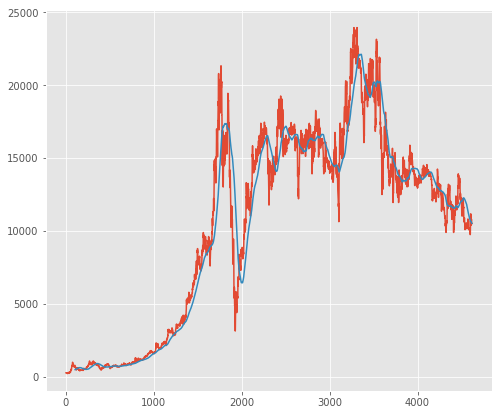

In [38]:
style.use('ggplot')
plt.plot(df['Adj Close'])
plt.plot(mavg)

## PLOT RETURN DEVIATION

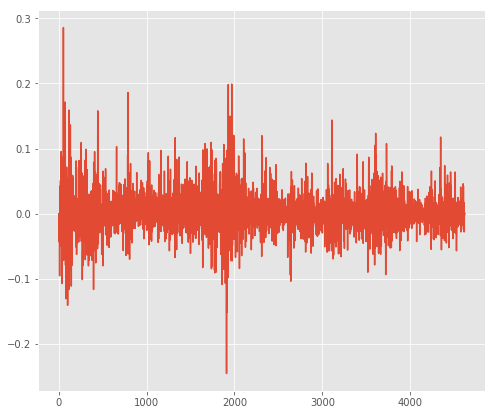

In [39]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [67]:
dfcomp = web.DataReader(['AALI.JK', 'BBCA.JK', 'AUTO.JK', 'BBRI.JK', 'KLBF.JK'],'yahoo',start=start,end=end)['Adj Close']

In [70]:
dfcomp = dfcomp.dropna()
dfcomp.head()

Symbols,AALI.JK,AUTO.JK,BBCA.JK,BBRI.JK,KLBF.JK
Date,,,,,
2010-01-04,16424.304688,597.712708,4490.014160,251.618240,176.631134
2010-01-05,16665.335938,592.515015,4534.469727,253.231216,176.631134
2010-01-06,16596.460938,597.712708,4401.103027,250.005325,180.645477
2010-01-07,17250.666016,597.712708,4423.330566,246.779449,180.645477
2010-01-08,17388.423828,602.910217,4312.191895,248.392349,181.983597


In [72]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()

In [73]:
corr

Symbols,AALI.JK,AUTO.JK,BBCA.JK,BBRI.JK,KLBF.JK
Symbols,,,,,
AALI.JK,1.000000,0.159165,0.249370,0.245617,0.189893
AUTO.JK,0.159165,1.000000,0.184578,0.195709,0.187382
BBCA.JK,0.249370,0.184578,1.000000,0.502654,0.365043
BBRI.JK,0.245617,0.195709,0.502654,1.000000,0.370904
KLBF.JK,0.189893,0.187382,0.365043,0.370904,1.000000


Text(0,0.5,'Returns AUTO')

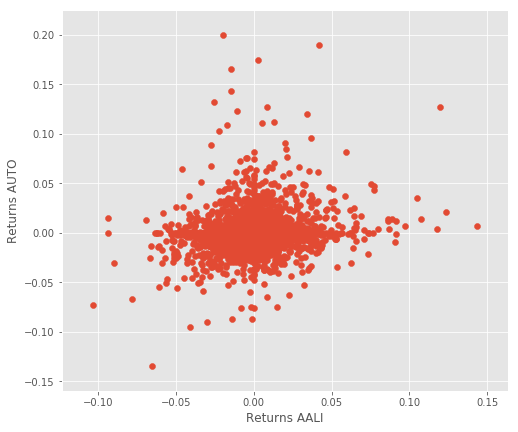

In [82]:
plt.scatter(retscomp['AALI.JK'], retscomp['AUTO.JK'])
plt.xlabel('Returns AALI')
plt.ylabel('Returns AUTO')

C:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


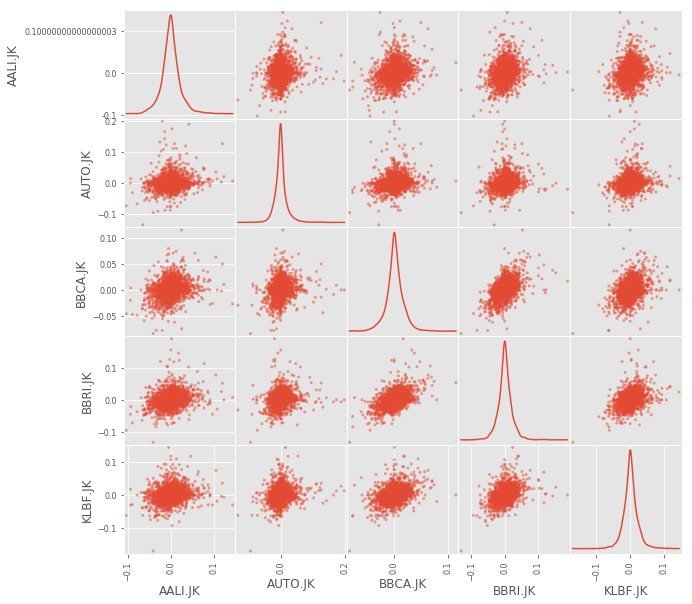

In [83]:
pd.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

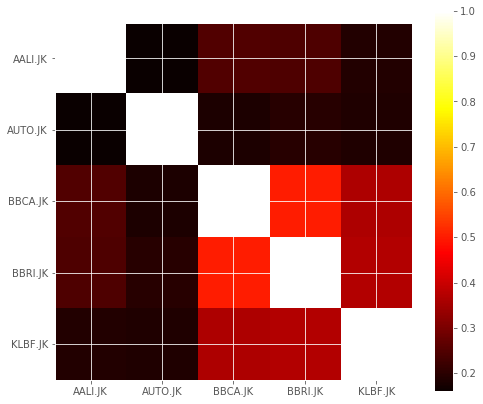

In [84]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

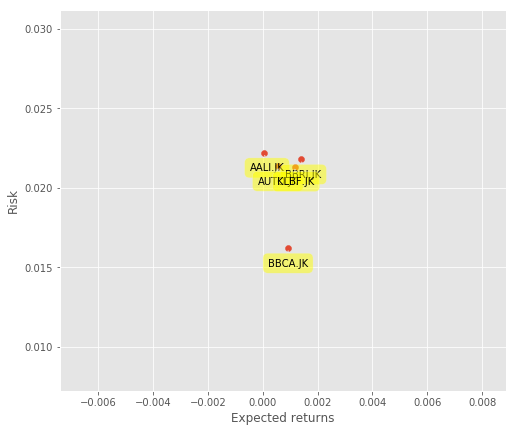

In [85]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))